# Investigating a dataset: No Show Appointments 

### Describing the features of the data

#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.  
● ‘Neighborhood’ indicates the
location of the hospital.  
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.  
● ‘No_show’ it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.  


### Introductions :  

#### Questions we are trying to answer :  

##### 1 - Observations from the Data at a glance.
##### 2 - What are the features that matter the most amongst ('Age', 'being alcoholic','Having an SMS', 'Gender', 'Scholarship'), to make the patient show up to their appiontment?
##### 3 - What is the overall appointment show-up vs. no show-up rate?  

### Importing the libraries that we gonna use in our investigation

In [64]:
#Importing Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [65]:
# Load the data. 
df = pd.read_csv('KaggleV2-May-2016.csv')

In [66]:
#Shape of the dataset
df.shape

(110527, 14)

In [67]:
#Getting a description of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the description;
* The mean age is 37, the oldest age is 115 and the min age is -1 which is unrealistic and needs to be corrected.

In [68]:
#Calculating the sum of the missing values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [69]:
#Printing the head of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [70]:
#Getting information on data types of the data as well as non null value count.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [71]:
# Checking for duplicates
print(sum(df.duplicated()))

0


In [72]:
#Checking the age for annomalies
df[df["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No



### Data Cleaning!

In [73]:
#Dropping columns we do not need.
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1,inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [76]:
#Renaming columns with proper names
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df['Neighbourhood'] = df['Neighbourhood'].str.lower()
df['Neighbourhood'] = df['Neighbourhood'].str.capitalize()
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,Jardim da penha,0,1,0,0,0,0,No
1,M,56,Jardim da penha,0,0,0,0,0,0,No
2,F,62,Mata da praia,0,0,0,0,0,0,No
3,F,8,Pontal de camburi,0,0,0,0,0,0,No
4,F,56,Jardim da penha,0,1,1,0,0,0,No


In [14]:
#We then fix any age has 0 or less values because they are unnecessary.
meanAge = df['Age'].mean()
df[df['Age'] <= 0] = meanAge

<a id='eda'></a>
## Exploratory Data Analysis

#### Research Question 1: A General Overview of the Data

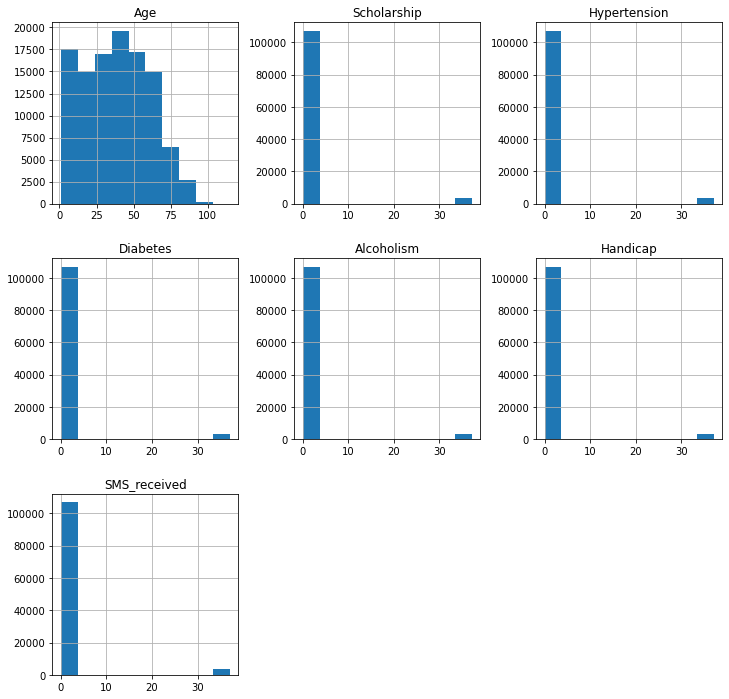

In [15]:
df.hist(figsize=(12,12));

#Conclusions from the plot above
* Majority of the patients have no chronic illnesses.
* Majority are also not handicapped.
* A moderate number of about 22,000 have hypertension.

In [16]:
#Masking the No_show column.
show = df.No_show == 'No'
noshow = df.No_show == 'Yes'

#Source : https://www.w3schools.com/python/pandas/ref_df_mask.asp#:~:text=The%20mask()%20method%20replaces,the%20The%20where()%20method.

### Research Question 2: What is the overall appointment show-up vs. no show-up rate By Different variables?

1. Gender

Text(0, 0.5, 'Patient Count')

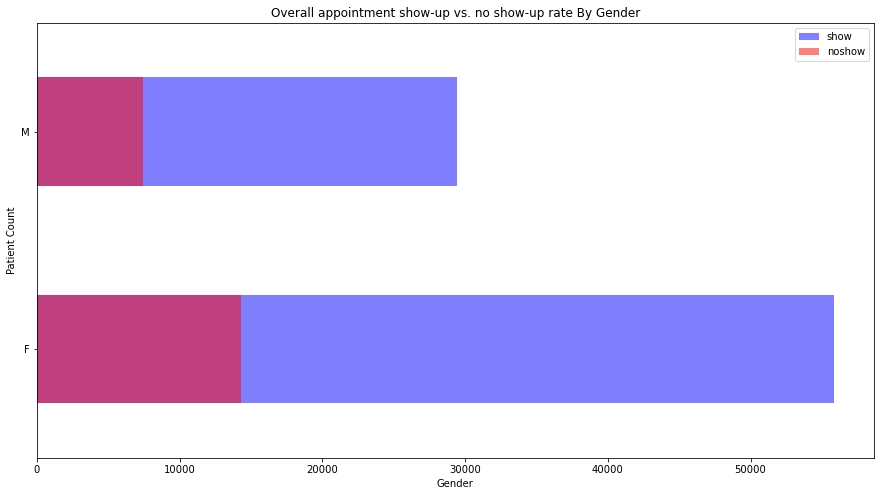

In [41]:
plt.figure(figsize = [15,8])
df.Gender[show].value_counts().plot(kind = 'barh', color = 'blue', alpha=0.5, label = 'show')
df.Gender[noshow].value_counts().plot(kind = 'barh', color = 'red', alpha=0.5, label = 'noshow')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By Gender")
plt.xlabel("Gender")
plt.ylabel("Patient Count")

In [18]:
#Numerical Representation of the graph
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())
df.groupby('Gender').No_show.value_counts()

F    55843
M    29464
Name: Gender, dtype: int64
F    14275
M     7405
Name: Gender, dtype: int64


Gender             No_show          
37.08887421173107  37.08887421173107     3540
F                  No                   55843
                   Yes                  14275
M                  No                   29464
                   Yes                   7405
Name: No_show, dtype: int64

#### Conclusion from Above 
* Gender is a rather insignificant measure for our analysis considering females who showed up and did not show were both more than the males which is rather inconclusive.

2. Brasilian Welfare Program

Text(0, 0.5, 'Patient Count')

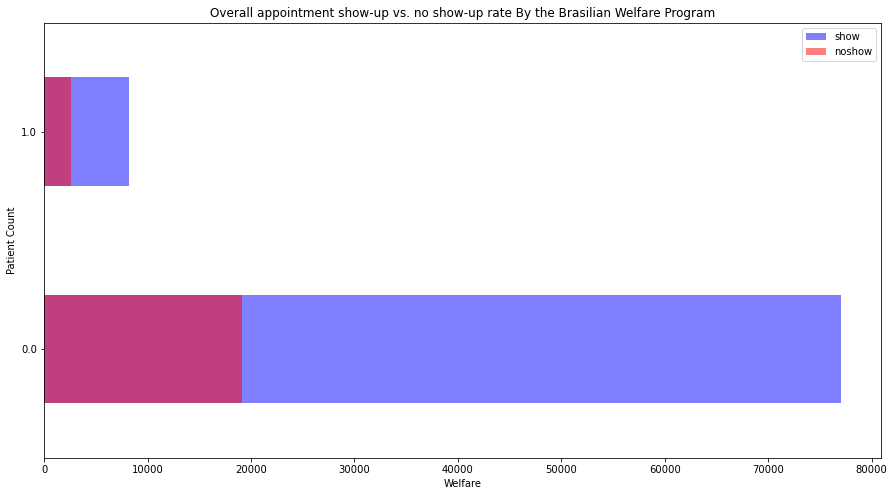

In [39]:
plt.figure(figsize = [15,8])
df.Scholarship[show].value_counts().plot(kind = 'barh', color = 'blue', alpha=0.5, label = 'show')
df.Scholarship[noshow].value_counts().plot(kind = 'barh', color = 'red', alpha=0.5, label = 'noshow')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By the Brasilian Welfare Program")
plt.xlabel("Welfare")
plt.ylabel("Patient Count")

In [38]:
#Numerical Representaion of the graph
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0.0    77069
1.0     8238
Name: Scholarship, dtype: int64
0.0    19109
1.0     2571
Name: Scholarship, dtype: int64


#### Conclusion
* Using the Brasilian Welfare Program is a rather insignificant measure

3. Hypertension

Text(0, 0.5, 'Patient Count')

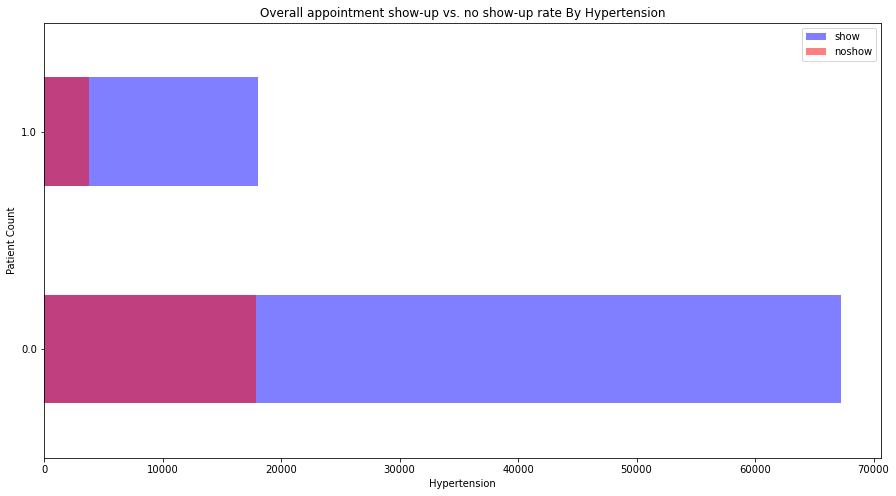

In [44]:
plt.figure(figsize = [15,8])
df.Hypertension[show].value_counts().plot(kind = 'barh', color = 'blue', alpha=0.5, label = 'show')
df.Hypertension[noshow].value_counts().plot(kind = 'barh', color = 'red', alpha=0.5, label = 'noshow')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Patient Count")

#### Conclusion
* Hypertension is also an insignificant measure

4. Diabetes

Text(0, 0.5, 'Patient Count')

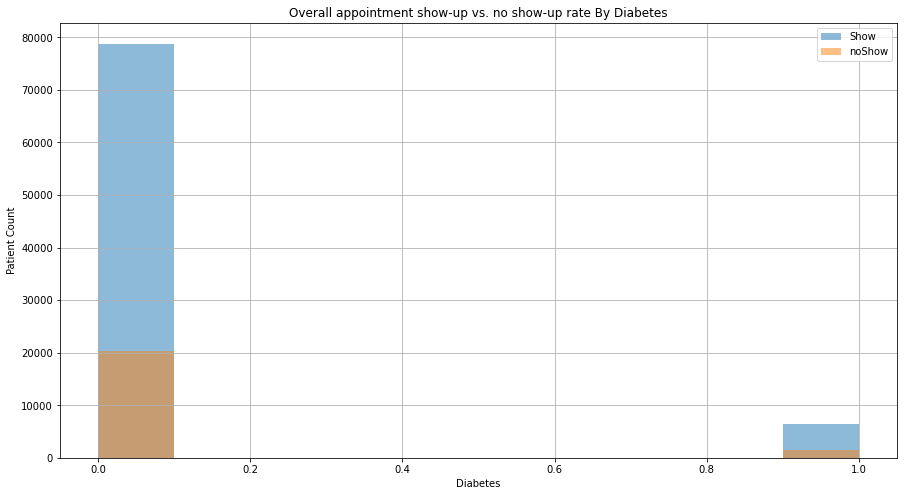

In [24]:
plt.figure(figsize = [15,8])
df.Diabetes[show].hist(alpha=0.5, label = 'Show')
df.Diabetes[noshow].hist(alpha=0.5, label = 'noShow')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Patient Count")

#### Conclusion
* Diabetes is also an insignificant measure

5. Alcoholism

Text(0, 0.5, 'Patient Count')

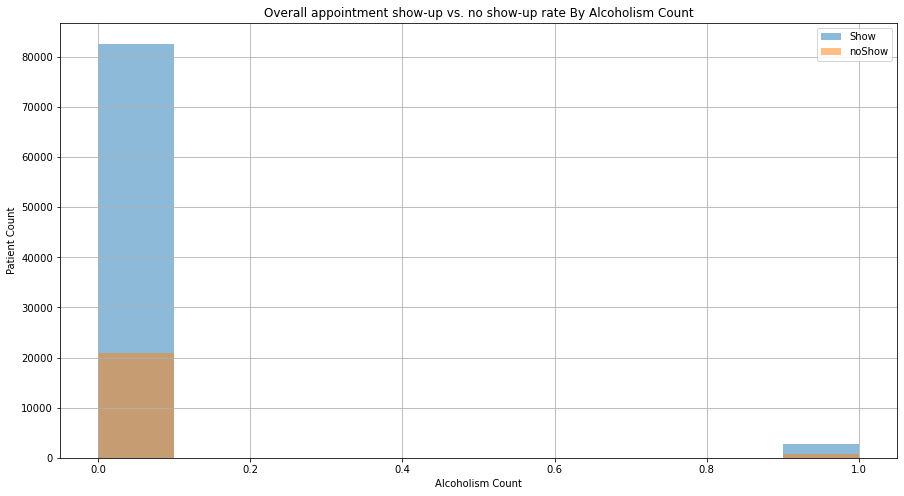

In [25]:
plt.figure(figsize = [15,8])
df.Alcoholism[show].hist(alpha=0.5, label = 'Show')
df.Alcoholism[noshow].hist(alpha=0.5, label = 'noShow')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By Alcoholism Count")
plt.xlabel("Alcoholism Count")
plt.ylabel("Patient Count")

#### Conclusion
* Alcoholism is also an insignificant measure

6. Handcapped

Text(0, 0.5, 'Patient Count')

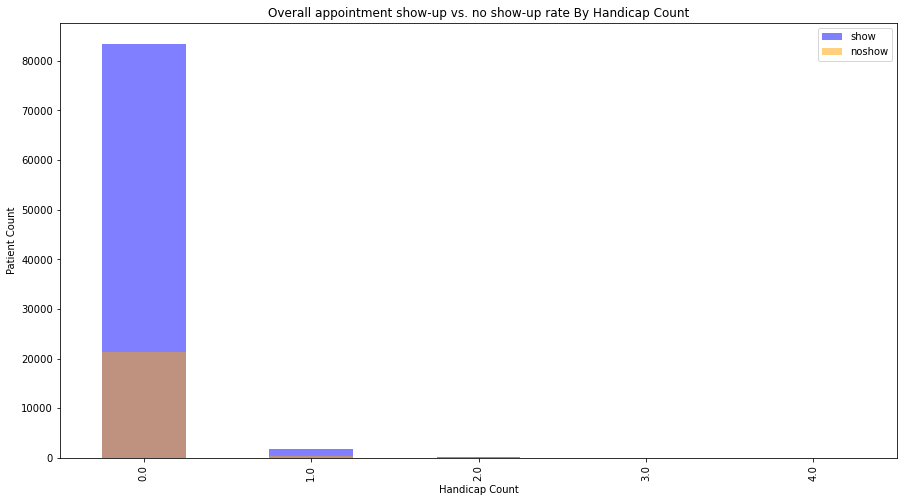

In [60]:
plt.figure(figsize = [15,8])
df.Handicap[show].value_counts().plot(kind = 'bar', color = 'blue', alpha=0.5, label = 'show')
df.Handicap[noshow].value_counts().plot(kind = 'bar', color = 'orange', alpha=0.5, label = 'noshow')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By Handicap Count")
plt.xlabel("Handicap Count")
plt.ylabel("Patient Count")

#### Conclusion
* Being Handcapped is also an insignificant measure

7. SMS Received

Text(0, 0.5, '')

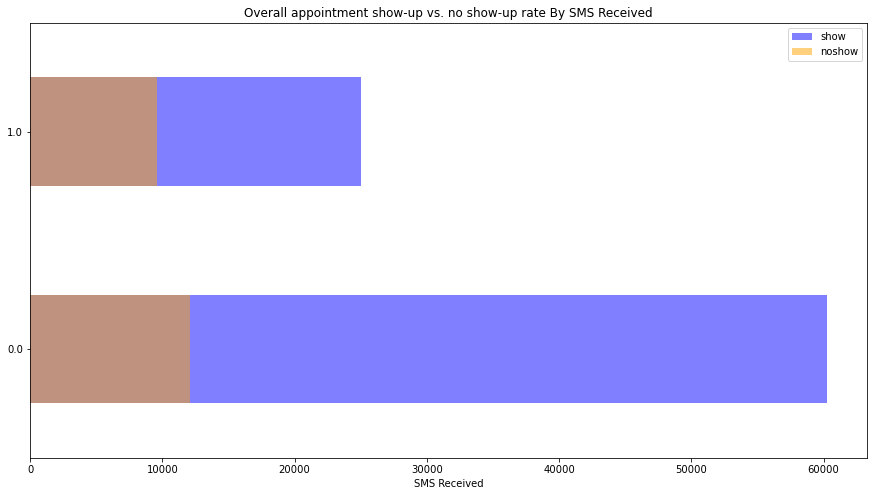

In [61]:
plt.figure(figsize = [15,8])
df.SMS_received[show].value_counts().plot(kind = 'barh', color = 'blue', alpha=0.5, label = 'show')
df.SMS_received[noshow].value_counts().plot(kind = 'barh', color = 'orange', alpha=0.5, label = 'noshow')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By SMS Received")
plt.xlabel("SMS Received")
plt.ylabel("")

#### Conclusion
* On the contrary to what we would have expected, more people showed up without even receiving as SMS

8. Age

Text(0, 0.5, 'Patient Count')

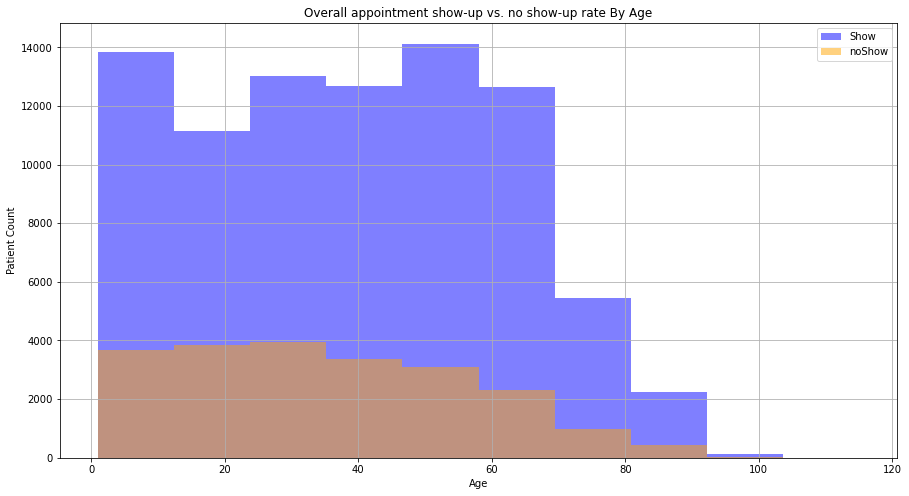

In [62]:
plt.figure(figsize = [15,8])
df.Age[show].hist(alpha=0.5, label = 'Show', color = 'blue')
df.Age[noshow].hist(alpha=0.5, label = 'noShow', color = 'orange')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By Age")
plt.xlabel("Age")
plt.ylabel("Patient Count")

#### Conclusion
* Age groups 0 - 10 and 35 - 70 showed up more than any other age ranges
* It is also worth noting that rates of appointment decreases as age increases.

9. Neighbourhood

Text(0, 0.5, 'Patient Count')

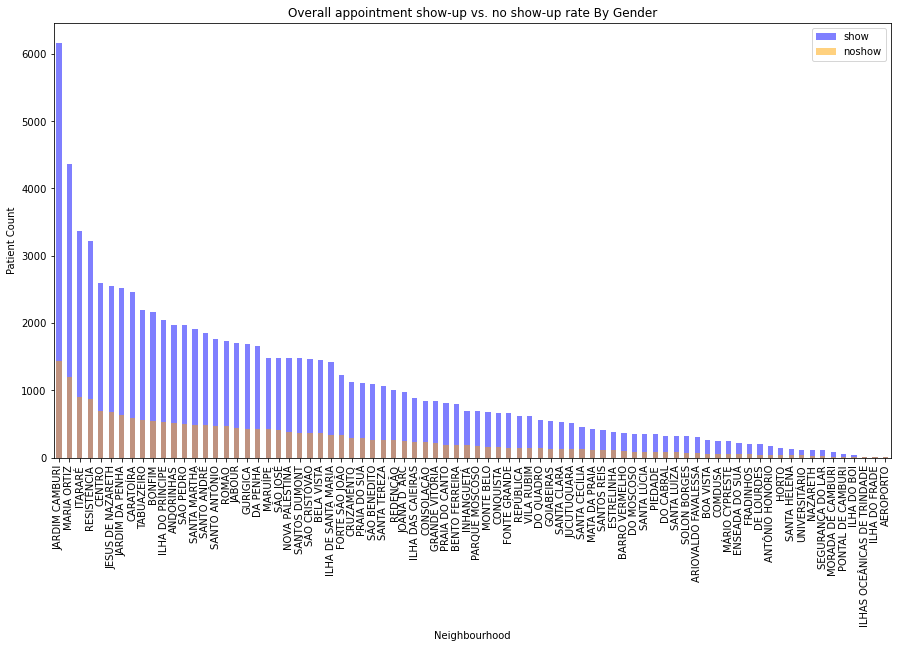

In [63]:
plt.figure(figsize = [15,8])
df.Neighbourhood[show].value_counts().plot(kind = 'bar', color = 'blue', alpha=0.5, label = 'show')
df.Neighbourhood[noshow].value_counts().plot(kind = 'bar', color = 'orange', alpha=0.5, label = 'noshow')
plt.legend(loc = 'best')
plt.title("Overall appointment show-up vs. no show-up rate By Gender")
plt.xlabel("Neighbourhood")
plt.ylabel("Patient Count")

#### Conclusion
* Neighbourhood clearly influences the number of patients who show up and those who do not.

### Research Question 3: What is the overall appointment show-up vs. no show-up rate?

19.615116668325385


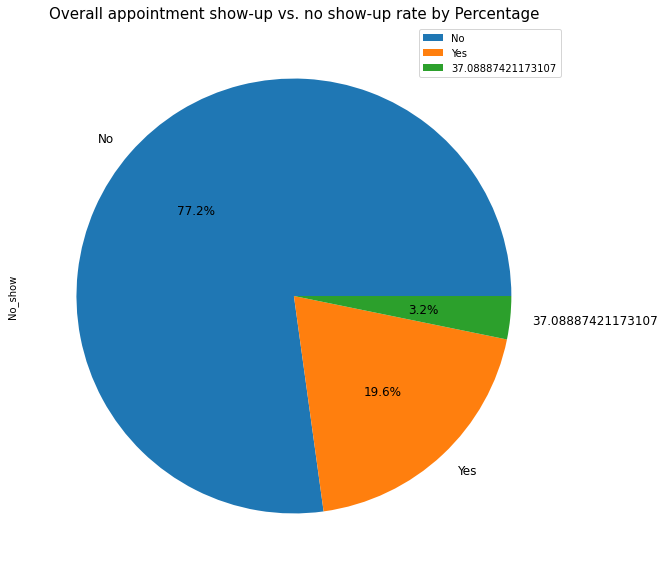

In [51]:
#Visualizing No show Vs Show value counts.
all_patients = df['No_show'].value_counts()
print(all_patients[1] / all_patients.sum() * 100)
pieChart = all_patients.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title('Overall appointment show-up vs. no show-up rate by Percentage', fontsize = 15);
plt.legend();

Therefore, Age is the most factor that affect people who will attend or not!

#### Conclusions
* Neighbourhood and age are the factors that influence whether or not a patient will shop up.
* An outstanding finding is that majority of the people show up even when they have not received an SMS pointing towards good awareness.

## Limitations:

#### Missing features that could be useful to get more sure what is the most feature that impacts showing to the appointment such as if the patient is employed or not , or whether the patient have a series medical issue or not.

In [78]:
def thankYou(name):
    print("Hello, " + name + ". Thank You for reviweing my Project.")
thankYou('Project Reviewer')

Hello, Project Reviewer. Thank You for reviweing my Project.
